In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# 1. Displaying the first few rows of the dataset: 

- This provides a glimpse of the data structure, variable names, and initial observations.


In [2]:
# Load the dataset
df = pd.read_csv('AmazonReview\Reviews.csv')

# Display the first 5 rows of the dataset
print("First 5 rows of the dataset:")

# print(df.head())
df.head()

First 5 rows of the dataset:


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# 2. Basic statistics: 

- Descriptive statistics, such as mean, standard deviation, minimum, maximum, and quartiles, help understand the central tendency, spread, and range of the numerical variables.

In [3]:
# Check the structure and basic information of the dataset
print("Dataset shape:\n", df.shape) # check the shape of the dataset

print("\nColumns:\n", df.columns) # check the column names

print("\nData types:\n", df.dtypes) # check the column data types

print("\nNumber of missing values:") # Check the missing values
df.isnull().sum()

Dataset shape:
 (568454, 10)

Columns:
 Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

Data types:
 Id                         int64
ProductId                 object
UserId                    object
ProfileName               object
HelpfulnessNumerator       int64
HelpfulnessDenominator     int64
Score                      int64
Time                       int64
Summary                   object
Text                      object
dtype: object

Number of missing values:


Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

# 3. Checking for missing values: 

- This step helps identify if any data is missing, which is crucial for data quality assessment and potential imputation or handling of missing values.


In [4]:
# Perform descriptive statistics
print("\nDescriptive statistics:\n")
df.describe()


Descriptive statistics:



,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,568454.000000,568454.000000,568454.00000,568454.000000,5.684540e+05
mean,284227.500000,1.743817,2.22881,4.183199,1.296257e+09
std,164098.679298,7.636513,8.28974,1.310436,4.804331e+07
min,1.000000,0.000000,0.00000,1.000000,9.393408e+08
25%,142114.250000,0.000000,0.00000,4.000000,1.271290e+09
50%,284227.500000,0.000000,1.00000,5.000000,1.311120e+09
75%,426340.750000,2.000000,2.00000,5.000000,1.332720e+09
max,568454.000000,866.000000,923.00000,5.000000,1.351210e+09



# 4. Distribution of scores: 

- A count plot/bar chart is created to visualize the distribution of scores. This helps understand the overall sentiment or satisfaction levels expressed in the reviews.

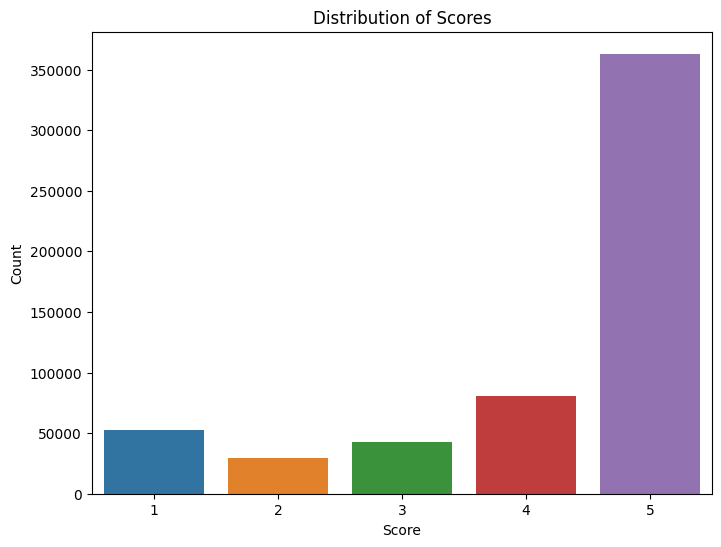

In [5]:
# Distribution of scores
plt.figure(figsize=(8, 6))
sns.countplot(x='Score', data=df)
plt.xlabel('Score')
plt.ylabel('Count')
plt.title('Distribution of Scores')
plt.show()


# 5. Distribution of helpfulness numerator and denominator: 

- Histograms are plotted to visualize the distribution of the numerator and denominator values, which indicate how helpful users found the reviews. This provides insights into the level of engagement and usefulness of the reviews.

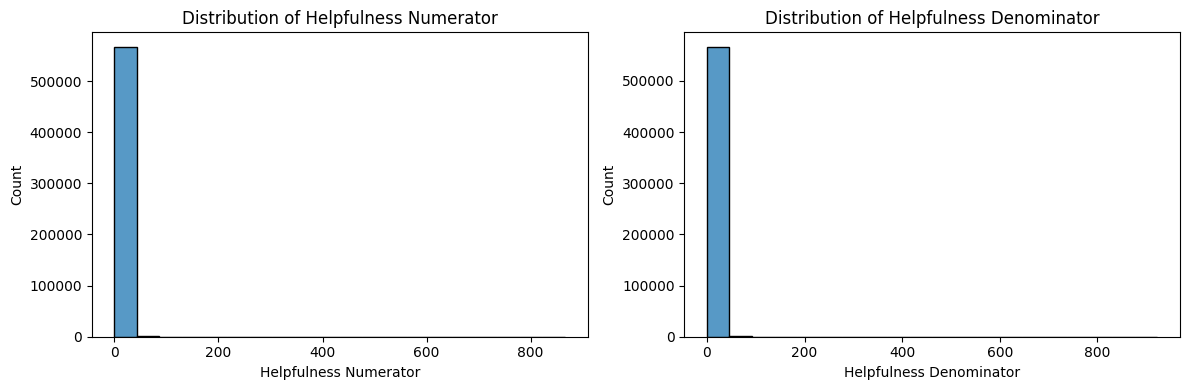

In [6]:
# Distribution of helpfulness numerator and denominator
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['HelpfulnessNumerator'], bins=20)
plt.xlabel('Helpfulness Numerator')
plt.ylabel('Count')
plt.title('Distribution of Helpfulness Numerator')

plt.subplot(1, 2, 2)
sns.histplot(df['HelpfulnessDenominator'], bins=20)
plt.xlabel('Helpfulness Denominator')
plt.ylabel('Count')
plt.title('Distribution of Helpfulness Denominator')

plt.tight_layout()
plt.show()

# 6. Top 10 users with the most reviews: 

- A horizontal bar chart is generated to identify the top users who have contributed the most reviews. This can help identify influential reviewers or frequent users.

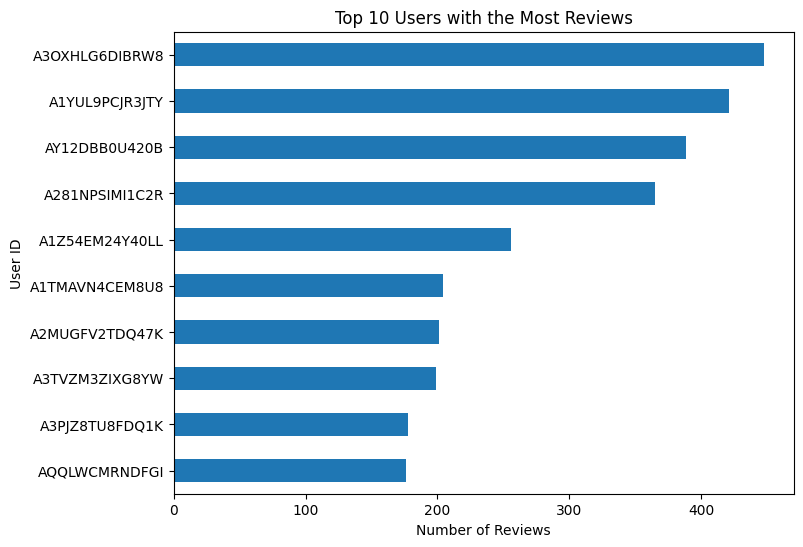

In [7]:
# Top 10 users with the most reviews
top_reviewers = df['UserId'].value_counts().head(10)
plt.figure(figsize=(8, 6))
top_reviewers.plot(kind='barh')
plt.xlabel('Number of Reviews')
plt.ylabel('User ID')
plt.title('Top 10 Users with the Most Reviews')
plt.gca().invert_yaxis()
plt.show()


# 7. Word cloud of review summaries: 

- A word cloud is created to visualize the most commonly occurring words in the review summaries. This helps identify frequently mentioned terms and gives a quick overview of the main topics or sentiments expressed in the reviews.

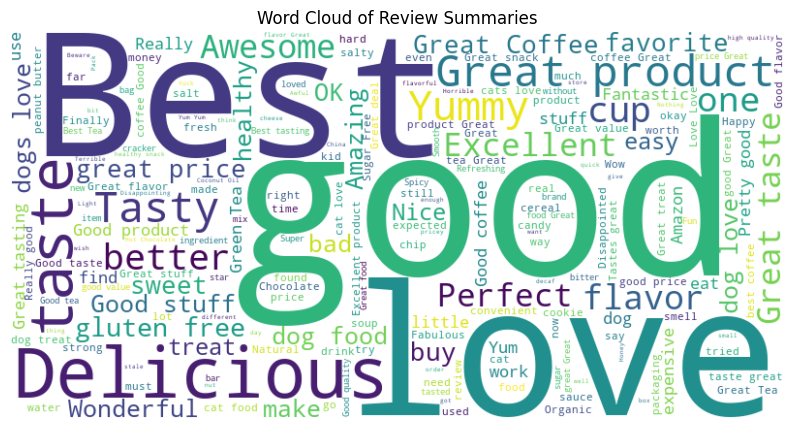

In [8]:
# Word cloud of review summaries
text = ' '.join(df['Summary'].dropna().values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Summaries')
plt.show()


# 8. Distribution of review lengths: 

- A histogram is plotted to visualize the distribution of review lengths. This provides insights into the length of reviews and helps understand if there are any patterns related to review length.


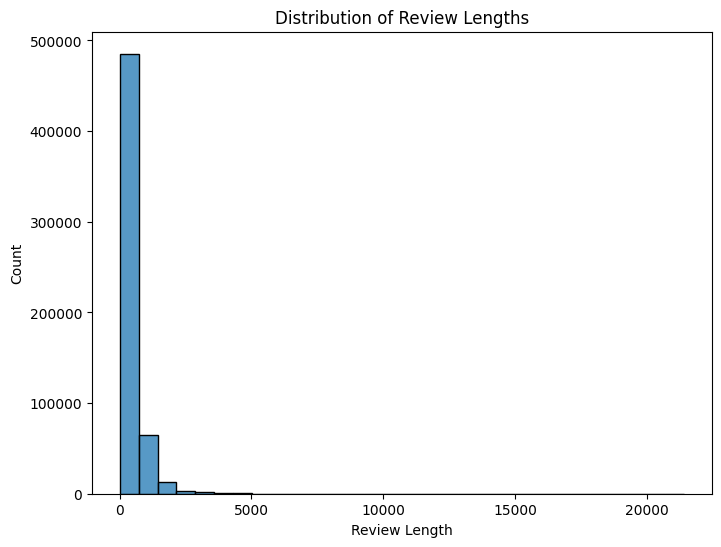

In [9]:
# Distribution of review lengths
df['Text Length'] = df['Text'].str.len()
plt.figure(figsize=(8, 6))
sns.histplot(df['Text Length'], bins=30)
plt.xlabel('Review Length')
plt.ylabel('Count')
plt.title('Distribution of Review Lengths')
plt.show()



# 9. Distribution of review lengths by score: 

- A box plot is created to explore the relationship between review lengths and the corresponding scores. This helps identify any potential connections between review length and the sentiment expressed in the reviews.

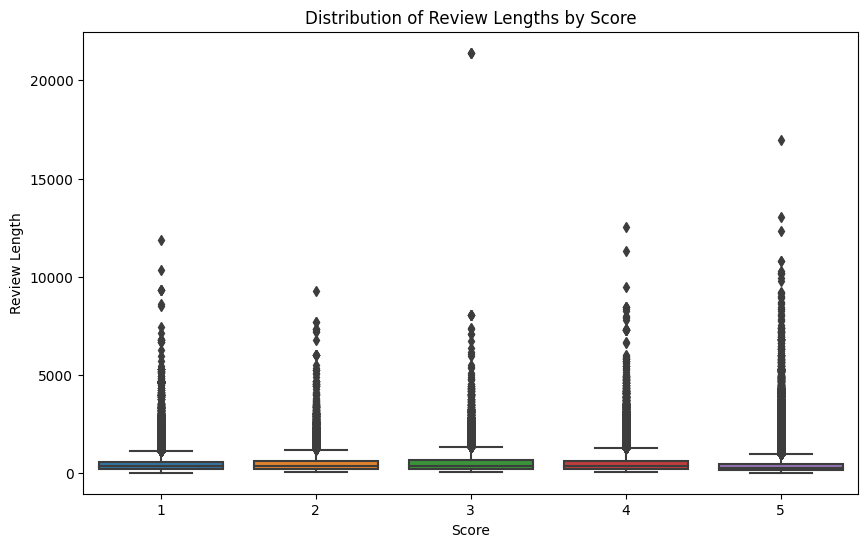

In [10]:

# Distribution of review lengths by score
plt.figure(figsize=(10, 6))
sns.boxplot(x='Score', y='Text Length', data=df)
plt.xlabel('Score')
plt.ylabel('Review Length')
plt.title('Distribution of Review Lengths by Score')
plt.show()


# 10. Correlation heatmap: 

A correlation matrix is calculated for the numeric variables in the dataset, and a heatmap is generated to visualize the correlations between variables. This helps identify relationships and dependencies between different features, providing insights into potential associations or dependencies in the data.

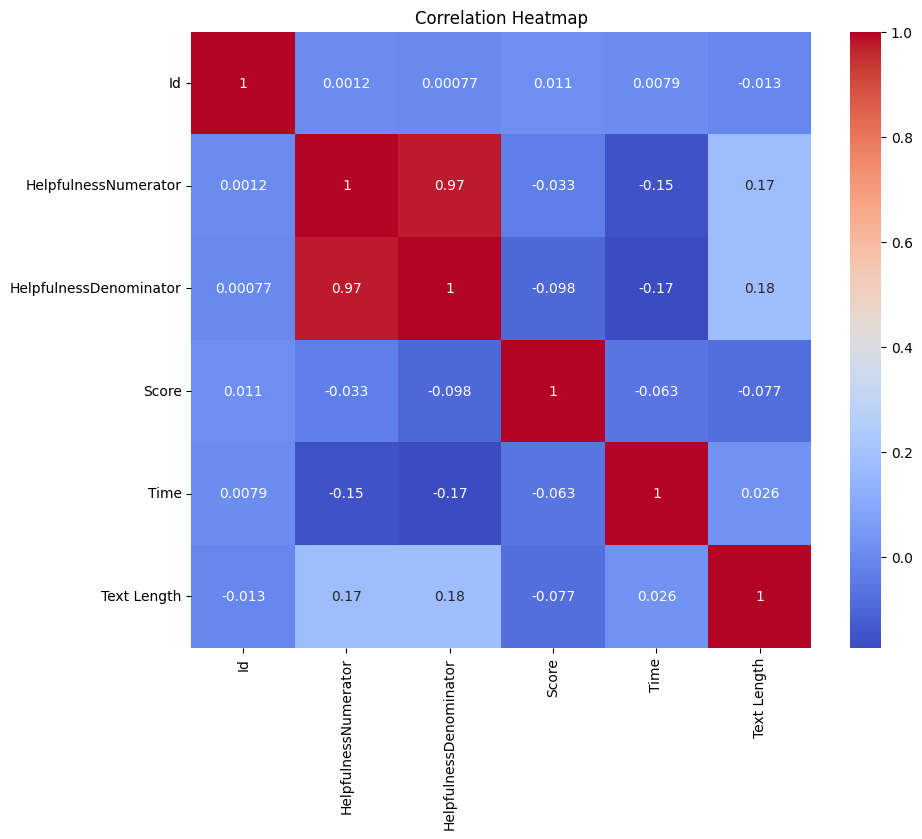

In [11]:
# Drop non-numeric columns
numeric_cols = df.select_dtypes(include='number')
correlation_df = numeric_cols.corr()

# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

The above complete EDA (Exploratory Data Analysis) is performed on the Amazon Fine Dine dataset to gain insights, understand the data distribution, identify patterns, and explore relationships between variables.

By performing these analysis steps, we can uncover patterns, understand the data distribution, explore relationships, and gain a comprehensive understanding of the Amazon Fine Dine dataset, allowing for more informed decision-making and further analysis.